## Imports

In [1]:
import os
import shutil
import tempfile
import json

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

import torch

import lightning
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

from monai_unet_cv import Net


In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device = ", device)
torch.backends.cudnn.benchmark = True

device =  cuda


In [3]:
PATH = "E:\\Visual Studio\\Task01_BrainTumour\\"
K_FOLDS = 5

## Run the training

In [4]:
torch.set_float32_matmul_precision('medium')
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
with open(PATH + "dataset.json", 'r') as f:
    data = json.load(f)

test_size = int(0.1 * len(data["training"]))
for i,  entry in enumerate(data["training"]):
        entry['image'] = os.path.abspath(os.path.join(PATH, entry['image']))
        entry['label'] = os.path.abspath(os.path.join(PATH, entry['label']))
test_data = data["training"][:test_size]
train_val_data = data["training"][test_size:]
kf = KFold(n_splits=K_FOLDS)

nets = []
for i, (train_index, val_index) in enumerate(kf.split(train_val_data), 1):
    data['training'] = [train_val_data[idx] for idx in train_index]
    data['validation'] = [train_val_data[idx] for idx in val_index]
    data['test'] = test_data

    # initialise the LightningModule
    net = Net(device=device, data=data, in_channels=4, out_channels=4, augmentation=False)

    early_stopping_callback = EarlyStopping(monitor="val_loss", mode="min", patience=30)
    max_epochs = 30

    # initialise Lightning's trainer.
    trainer = lightning.Trainer(
        devices=[0],
        max_epochs=max_epochs,
        callbacks=[early_stopping_callback],
        log_every_n_steps=4,
    )

    # train
    trainer.fit(net)

    # save net
    nets.append(net)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
g:\Anaconda\install\envs\D7043EProject\Lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
g:\Anaconda\install\envs\D7043EProject\Lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version

Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:04<00:00,  2.35s/it]current epoch: 0 current val_loss: 2.3291501998901367 current mean dice: 0.0262
best mean dice: 0.0262 at epoch: 0
Epoch 0: 100%|██████████| 348/348 [03:43<00:00,  1.55it/s, v_num=15]       current epoch: 0 current val_loss: 0.9767870903015137 current mean dice: 0.2356
best mean dice: 0.2356 at epoch: 0
Epoch 1: 100%|██████████| 348/348 [02:24<00:00,  2.41it/s, v_num=15]current epoch: 1 current val_loss: 0.7054497599601746 current mean dice: 0.3031
best mean dice: 0.3031 at epoch: 1
Epoch 2: 100%|██████████| 348/348 [02:21<00:00,  2.45it/s, v_num=15]current epoch: 2 current val_loss: 0.6842760443687439 current mean dice: 0.2867
best mean dice: 0.3031 at epoch: 1
Epoch 3: 100%|██████████| 348/348 [02:21<00:00,  2.45it/s, v_num=15]current epoch: 3 current val_loss: 0.6196854710578918 current mean dice: 0.3415
best mean dice: 0.3415 at epoch: 3
Epoch 4: 100%|██████████| 348/348 [02:23<00:00,  2.42it/s, v_num=15]cur

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 348/348 [02:31<00:00,  2.30it/s, v_num=15]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 48/48 [00:47<00:00,  1.01it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 76.9 M
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
76.9 M    Trainable params
0         Non-trainable params
76.9 M    Total params
307.510   Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]current epoch: 0 current val_loss: 2.3023979663848877 current mean dice: 0.0218
best mean dice: 0.0218 at epoch: 0
Epoch 0: 100%|██████████| 349/349 [02:22<00:00,  2.45it/s, v_num=16]       current epoch: 0 current val_loss: 1.0324771404266357 current mean dice: 0.1958
best mean dice: 0.1958 at epoch: 0
Epoch 1: 100%|██████████| 349/349 [02:25<00:00,  2.39it/s, v_num=16]current epoch: 1 current val_loss: 0.7861272692680359 current mean dice: 0.2367
best mean dice: 0.2367 at epoch: 1
Epoch 2: 100%|██████████| 349/349 [02:24<00:00,  2.42it/s, v_num=16]current epoch: 2 current val_loss: 0.8207293748855591 current mean dice: 0.1656
best mean dice: 0.2367 at epoch: 1
Epoch 3: 100%|██████████| 349/349 [02:22<00:00,  2.45it/s, v_num=16]current epoch: 3 current val_loss: 0.6644203066825867 current mean dice: 0.3200
best mean dice: 0.3200 at epoch: 3
Epoch 4: 100%|██████████| 349/349 [02:22<00:00,  2.45it/s, v_num=16]cur

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 349/349 [02:31<00:00,  2.31it/s, v_num=16]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 48/48 [00:48<00:00,  1.01s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 76.9 M
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
76.9 M    Trainable params
0         Non-trainable params
76.9 M    Total params
307.510   Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]current epoch: 0 current val_loss: 2.3199048042297363 current mean dice: 0.0142
best mean dice: 0.0142 at epoch: 0
Epoch 0: 100%|██████████| 349/349 [02:47<00:00,  2.08it/s, v_num=17]       current epoch: 0 current val_loss: 1.008117437362671 current mean dice: 0.0813
best mean dice: 0.0813 at epoch: 0
Epoch 1: 100%|██████████| 349/349 [02:27<00:00,  2.37it/s, v_num=17]current epoch: 1 current val_loss: 0.8666893839836121 current mean dice: 0.2200
best mean dice: 0.2200 at epoch: 1
Epoch 2: 100%|██████████| 349/349 [02:26<00:00,  2.39it/s, v_num=17]current epoch: 2 current val_loss: 0.6791772842407227 current mean dice: 0.2350
best mean dice: 0.2350 at epoch: 2
Epoch 3: 100%|██████████| 349/349 [02:24<00:00,  2.41it/s, v_num=17]current epoch: 3 current val_loss: 0.6638784408569336 current mean dice: 0.2609
best mean dice: 0.2609 at epoch: 3
Epoch 4: 100%|██████████| 349/349 [02:24<00:00,  2.41it/s, v_num=17]curr

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 349/349 [02:32<00:00,  2.28it/s, v_num=17]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 48/48 [00:49<00:00,  1.04s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 76.9 M
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
76.9 M    Trainable params
0         Non-trainable params
76.9 M    Total params
307.510   Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]current epoch: 0 current val_loss: 2.1955761909484863 current mean dice: 0.0166
best mean dice: 0.0166 at epoch: 0
Epoch 0: 100%|██████████| 349/349 [02:23<00:00,  2.44it/s, v_num=18]       current epoch: 0 current val_loss: 1.0094060897827148 current mean dice: 0.1473
best mean dice: 0.1473 at epoch: 0
Epoch 1: 100%|██████████| 349/349 [02:26<00:00,  2.39it/s, v_num=18]current epoch: 1 current val_loss: 0.8389937281608582 current mean dice: 0.1920
best mean dice: 0.1920 at epoch: 1
Epoch 2: 100%|██████████| 349/349 [02:27<00:00,  2.37it/s, v_num=18]current epoch: 2 current val_loss: 0.6928921937942505 current mean dice: 0.2777
best mean dice: 0.2777 at epoch: 2
Epoch 3: 100%|██████████| 349/349 [02:24<00:00,  2.41it/s, v_num=18]current epoch: 3 current val_loss: 0.7397686243057251 current mean dice: 0.3065
best mean dice: 0.3065 at epoch: 3
Epoch 4: 100%|██████████| 349/349 [02:24<00:00,  2.41it/s, v_num=18]cur

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 349/349 [02:31<00:00,  2.30it/s, v_num=18]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 48/48 [00:48<00:00,  1.02s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 76.9 M
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
76.9 M    Trainable params
0         Non-trainable params
76.9 M    Total params
307.510   Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]current epoch: 0 current val_loss: 2.28713321685791 current mean dice: 0.0185
best mean dice: 0.0185 at epoch: 0
Epoch 0: 100%|██████████| 349/349 [03:07<00:00,  1.86it/s, v_num=19]       current epoch: 0 current val_loss: 0.926927387714386 current mean dice: 0.1715
best mean dice: 0.1715 at epoch: 0
Epoch 1: 100%|██████████| 349/349 [02:27<00:00,  2.37it/s, v_num=19]current epoch: 1 current val_loss: 0.7271931767463684 current mean dice: 0.2309
best mean dice: 0.2309 at epoch: 1
Epoch 2: 100%|██████████| 349/349 [02:23<00:00,  2.44it/s, v_num=19]current epoch: 2 current val_loss: 0.7390336394309998 current mean dice: 0.2349
best mean dice: 0.2349 at epoch: 2
Epoch 3: 100%|██████████| 349/349 [02:22<00:00,  2.45it/s, v_num=19]current epoch: 3 current val_loss: 0.626663088798523 current mean dice: 0.3433
best mean dice: 0.3433 at epoch: 3
Epoch 4: 100%|██████████| 349/349 [02:22<00:00,  2.45it/s, v_num=19]current

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 349/349 [02:32<00:00,  2.30it/s, v_num=19]


## Plot the loss and dice metric

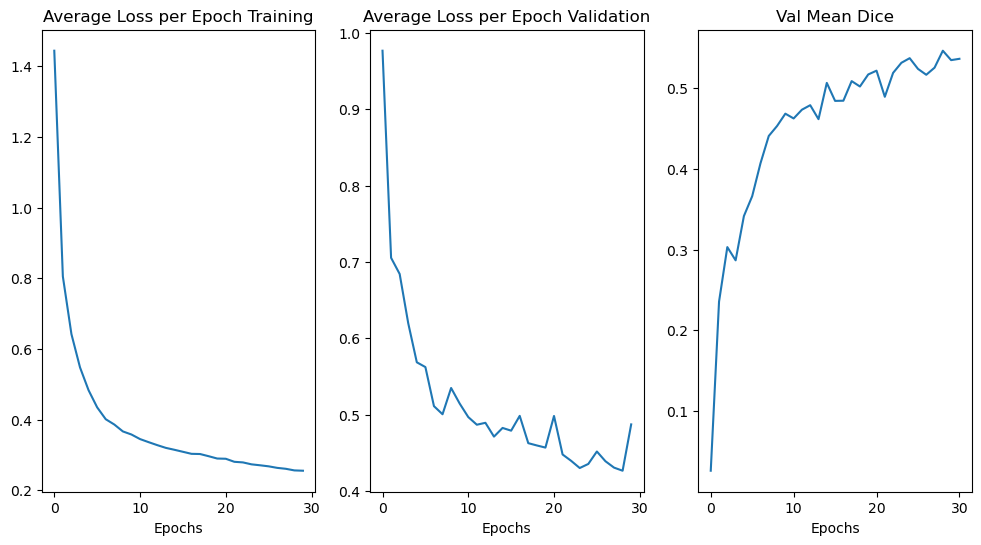

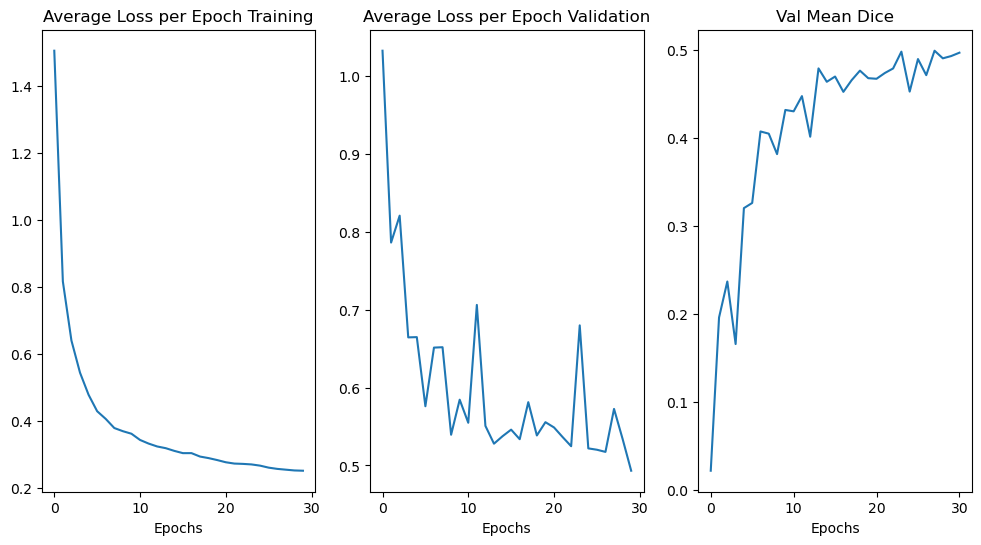

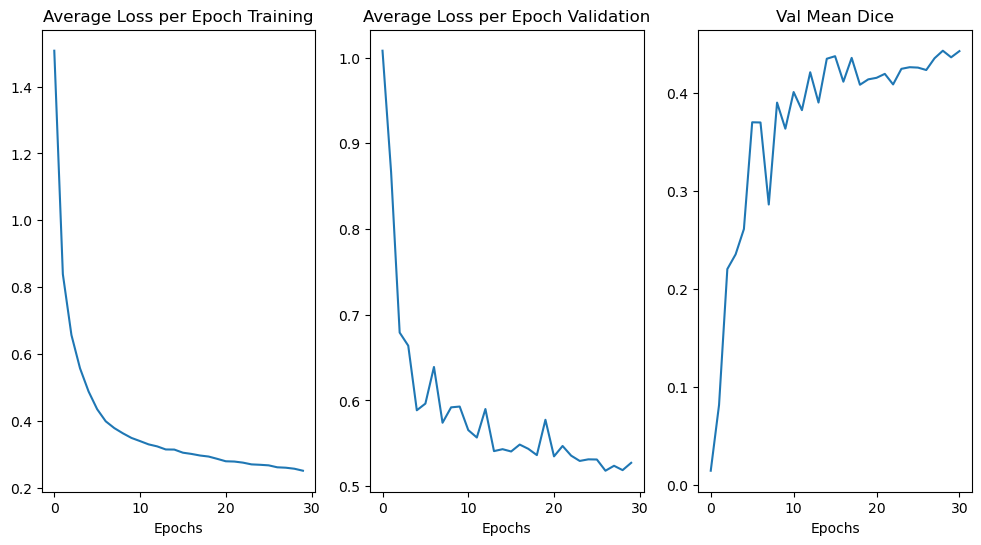

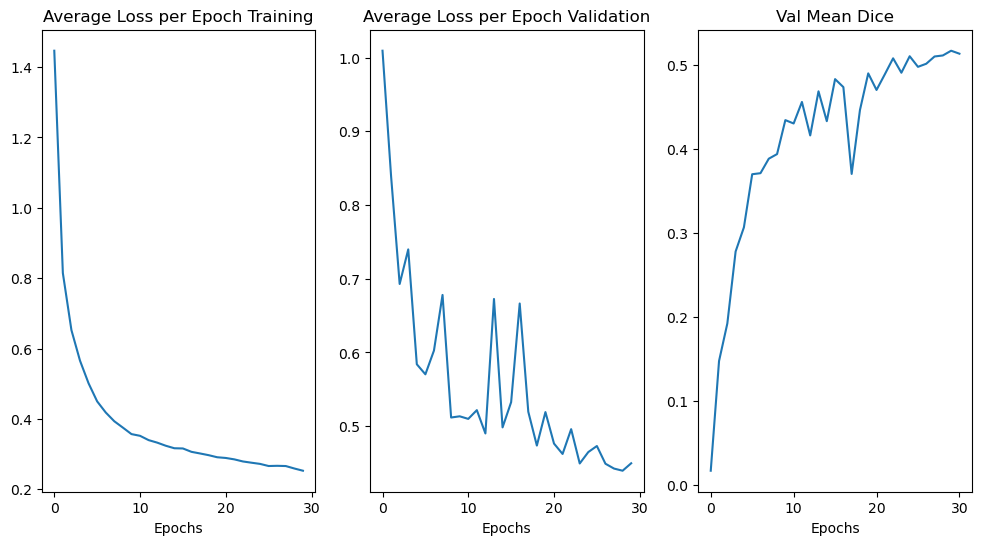

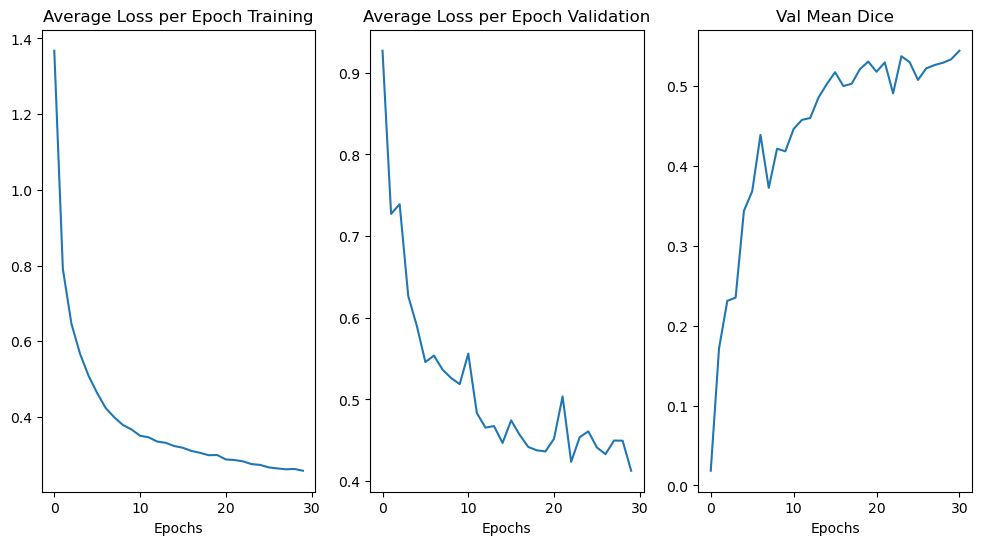

In [6]:
for j, net in enumerate(nets):   
    plt.figure("train", (12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Average Loss per Epoch Training")
    x = [i for i in range(0,len(net.epoch_train_loss))]
    y = net.epoch_train_loss
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.subplot(1, 3, 2)
    plt.title("Average Loss per Epoch Validation")
    # skip first epoch for validation loss as it is very high
    x = [i for i in range(0,len(net.epoch_val_loss)-1)]
    y = net.epoch_val_loss[1:]
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.subplot(1, 3, 3)
    plt.title("Val Mean Dice")
    x = [i for i in range(0,len(net.metric_values))]
    y = net.metric_values
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.show()

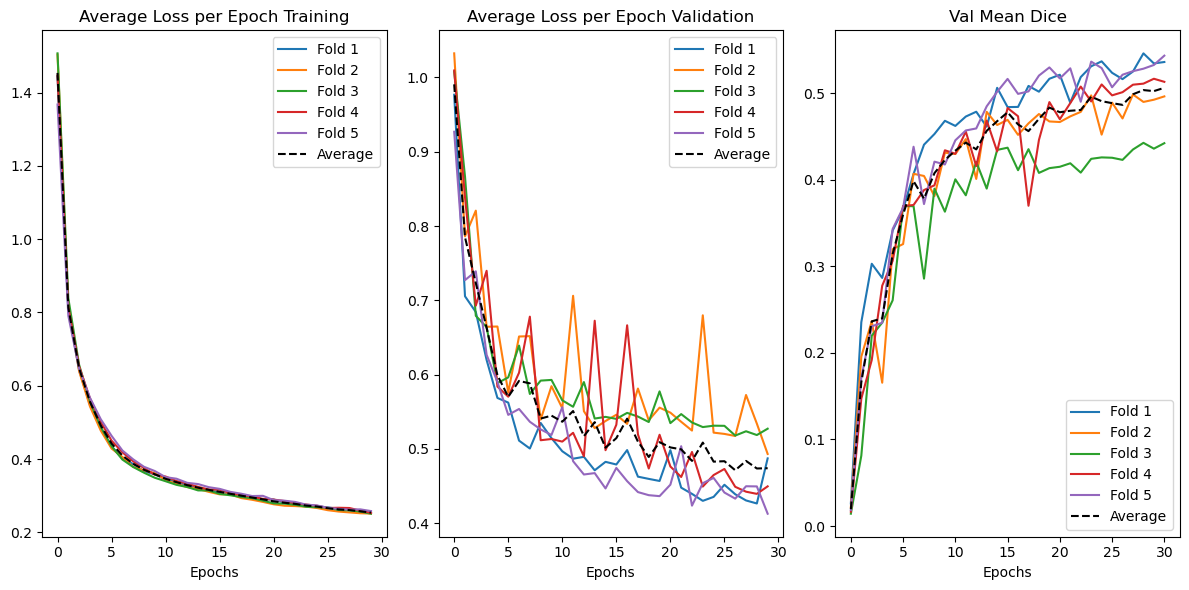

In [7]:
plt.figure("Training & Validation", (12, 6))

# Plot Average Loss per Epoch Training for all networks
plt.subplot(1, 3, 1)
plt.title("Average Loss per Epoch Training")
plt.xlabel("Epochs")
all_train_losses = []

for j, net in enumerate(nets):
    x = [i for i in range(len(net.epoch_train_loss))]
    y = net.epoch_train_loss
    plt.plot(x, y, label=f'Fold {j+1}')
    all_train_losses.append(y)

# Calculate the average for training loss
avg_train_loss = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*all_train_losses)]
plt.plot(x, avg_train_loss, '--', color='black', label='Average')

plt.legend()

# Plot Average Loss per Epoch Validation for all networks
plt.subplot(1, 3, 2)
plt.title("Average Loss per Epoch Validation")
plt.xlabel("Epochs")
all_val_losses = []

for j, net in enumerate(nets):
    x = [i for i in range(len(net.epoch_val_loss) - 1)]
    y = net.epoch_val_loss[1:]  # Skip first epoch
    plt.plot(x, y, label=f'Fold {j+1}')
    all_val_losses.append(y)

# Calculate the average for validation loss
avg_val_loss = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*all_val_losses)]
plt.plot(x, avg_val_loss, '--', color='black', label='Average')

plt.legend()

# Plot Val Mean Dice for all networks
plt.subplot(1, 3, 3)
plt.title("Val Mean Dice")
plt.xlabel("Epochs")
all_dice_scores = []

for j, net in enumerate(nets):
    x = [i for i in range(len(net.metric_values))]
    y = net.metric_values
    plt.plot(x, y, label=f'Fold {j+1}')
    all_dice_scores.append(y)

# Calculate the average for mean dice
avg_dice_score = [sum(epoch_scores) / len(epoch_scores) for epoch_scores in zip(*all_dice_scores)]
plt.plot(x, avg_dice_score, '--', color='black', label='Average')

plt.legend()

plt.tight_layout()
plt.show()
